# **AdaBoost** 

## Import & Data

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Fish.csv")

* Weight : Balığın gram cinsinden ağırlığı
* Length1 : cm cinsinden dikey uzunluk
* Length2 : cm cinsinden diyagonal uzunluk
* Length3 : cm cinsinden çapraz uzunluk
* Height : cm cinsinden yükseklik
* Width : cm cinsinden diyagonal genişlik

---
## EDA

In [252]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

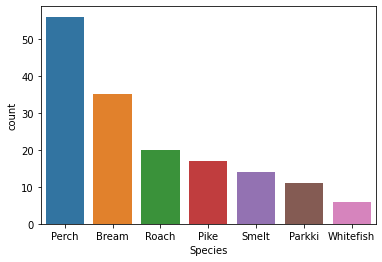

In [253]:
sns.countplot(x="Species", data=df, order=df["Species"].value_counts().index)

In [254]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


---
## Train Test Split

In [255]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
 test_size=0.4, random_state=9)

---
## Modelleme

In [257]:
from sklearn.ensemble import AdaBoostClassifier

In [258]:
model = AdaBoostClassifier(n_estimators=1)

In [259]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [260]:
balik_pred = model.predict(X_test)

---
## Değerlendirme Kriterleri

In [261]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [262]:
print(classification_report(y_test, balik_pred))

              precision    recall  f1-score   support

       Bream       1.00      0.81      0.90        16
      Parkki       0.00      0.00      0.00         4
       Perch       0.39      1.00      0.56        20
        Pike       0.00      0.00      0.00         5
       Roach       0.00      0.00      0.00        11
       Smelt       0.00      0.00      0.00         6
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.52        64
   macro avg       0.20      0.26      0.21        64
weighted avg       0.37      0.52      0.40        64



c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

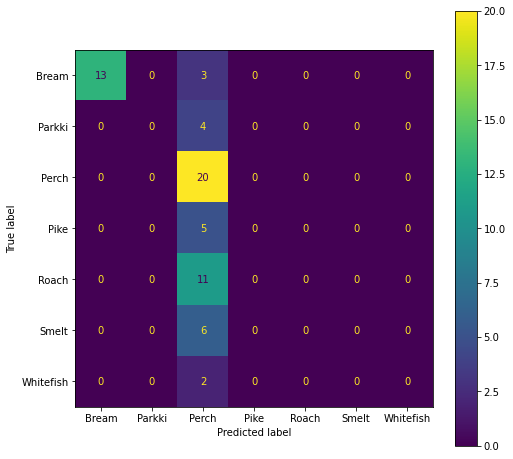

In [263]:
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)

In [264]:
model.feature_importances_

array([0., 0., 0., 0., 1., 0.])

In [265]:
model.feature_importances_.argmax()

4

In [266]:
X.columns[4]

'Height'

<AxesSubplot:xlabel='Species', ylabel='Height'>

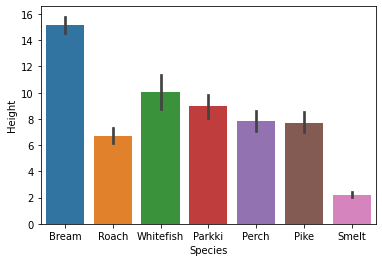

In [267]:
sns.barplot(x= "Species", y="Height", data=df)

In [268]:
df.describe()
#En çok fark Ağırlıkta olamsına rağmen ..
# parametre olarak en baskın olanı height olarak seçilmiş.

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


---
## Performans İncelemesi

In [269]:
hata_oran = []

for balik in range(1,50):
    model = AdaBoostClassifier(n_estimators= balik)
    model.fit(X_train, y_train)
    balik_deneme = model.predict(X_test)
    error = 1 - accuracy_score(y_test, balik_deneme)

    hata_oran.append(error)

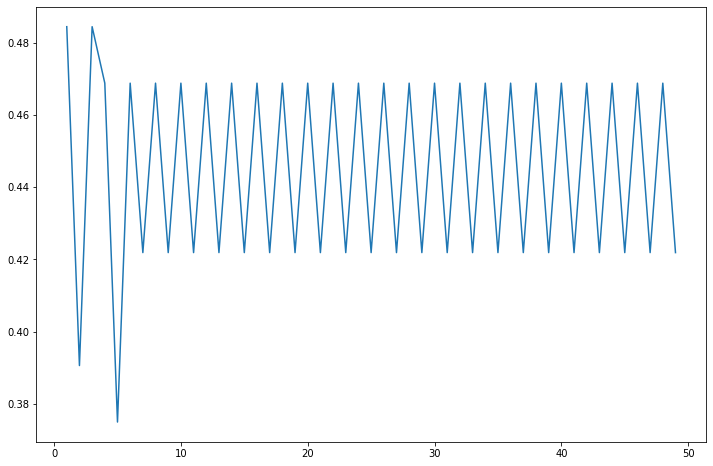

In [270]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50), hata_oran)

### Burada 2 muhtemel sorun olabilir
1. Biz kodlamada yanlış yapmış olabiliriz ve model ile algoritme arasında bir uyumsuzluk oluşmuş olabilir
2. Seçtiğimiz veri setine uygun bir model kullanmamış olabiliriz. 

###### (random_state değerini kaldırıp farklı değerlerde nasıl sonuç verdiğini incelemenizi öneririm.)

---
---
# **https://www.youtube.com/shorts/396gGW4VhM4**